In [19]:
from cgmbrush import *
import numpy as np
from scipy.ndimage.filters import convolve
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
#from truth.truth import AssertThat # considering using PyTruth for fluent assertions

def plot_grid_comparison(new, baseline):
    fig, ax = plt.subplots(1,2,figsize=(24, 12))
    pos = ax[0].imshow(new)
    ax[0].title.set_text('New Result')
    fig.colorbar(pos, ax=ax[0])
    pos = ax[1].imshow(baseline)
    ax[1].title.set_text('Baseline')
    fig.colorbar(pos, ax=ax[1])
    return fig

                
    # TODO Getting one colorbar to work correctly is hard. 
    # Would be nice to have one colorbar with the min and max values of it taken from across the two images.
    
    #vmax = max(np.max(results[0][0:128, 0:128]), np.max(baseline[0][0:128, 0:128]))
    #norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    #fig.colorbar(mpl.cm.ScalarMappable(norm=norm), cax=cbar_ax)
    

In [2]:

a = np.zeros((100, 100))
a[49][48] = 1
a[49][49] = 1
a[49][50] = 1
a[48][49] = 1
a[50][49] = 1

a_single_dot = np.zeros((30, 30))
a_single_dot[14][14] = 1

a_with_corner = np.zeros((30, 30))
a_with_corner[14][14] = 1
a_with_corner[14][15] = 1
a_with_corner[14][13] = 1
a_with_corner[15][14] = 1
a_with_corner[13][14] = 1
a_with_corner[1][0] = 1
a_with_corner[1][2] = 1
a_with_corner[1][1] = 1
a_with_corner[2][1] = 1
a_with_corner[0][1] = 1

b_even = np.zeros((10,10))
b_even[4][3] = 1
b_even[4][5] = 1
b_even[4][4] = 1
b_even[3][4] = 1
b_even[5][4] = 1

b_big = np.zeros((80,80))
b_big[39][39] = 1
b_big[40][39] = 1
b_big[38][39] = 1
b_big[39][40] = 1
b_big[39][38] = 1

b_odd = np.zeros((15,15))
b_odd[7][7] = 1
b_odd[7][8] = 1
b_odd[7][6] = 1
b_odd[8][7] = 1
b_odd[6][7] = 1

b_lumpy = np.zeros((20,20))
b_lumpy[11][10] = 0.1154235
b_lumpy[10][11] = 0.111363
b_lumpy[11][11] = 0.4854334

# Resolution 1 equivalent in cgmbrush
a_large = np.random.random((1024,1024))
b_random = np.random.random((20,20))

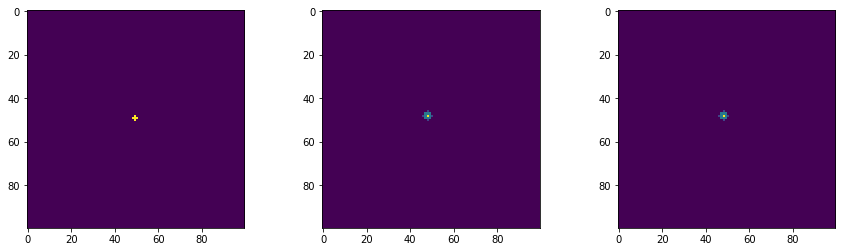

In [3]:
# Proof that my implementation is equivalent to what we did before for even sized filters
c8 = convolve(a, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

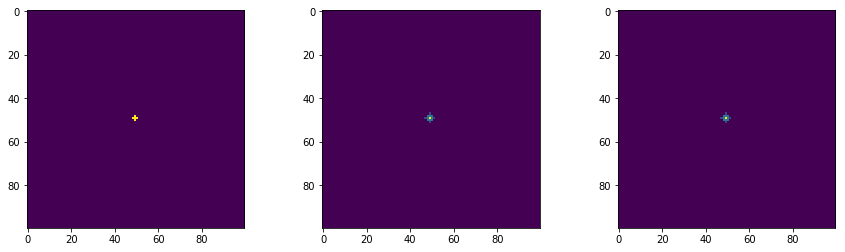

In [4]:
# Proof that my implementation is equivalent to what we did before for odd sized filters
c8 = convolve(a, b_odd, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_odd)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

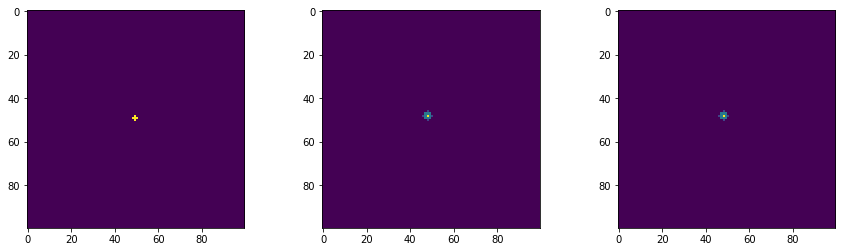

In [5]:
# Proof that my implementation is equivalent to what we did before for large masks
c8 = convolve(a, b_big, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_big)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

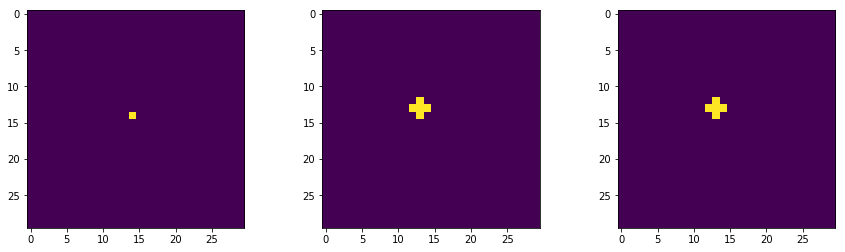

In [6]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_single_dot, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_single_dot, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_single_dot) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

assert (not np.allclose(np.zeros((30,30)), c3)), "should be false"

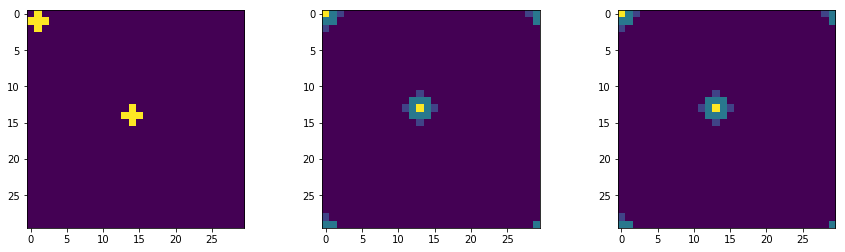

In [7]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_with_corner, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_with_corner, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_with_corner) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

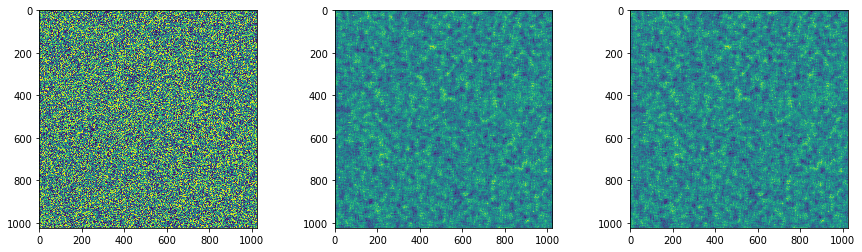

In [8]:
# Proof that my implementation is equivalent to what we did before when stuff both imputs are random values
c8 = convolve(a_large, b_random, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_random)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

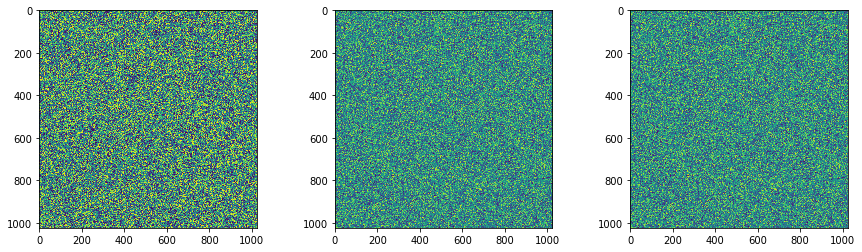

In [9]:
# Proof that my implementation is equivalent to what we did before for lumpy mask
c8 = convolve(a_large, b_lumpy, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_lumpy)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

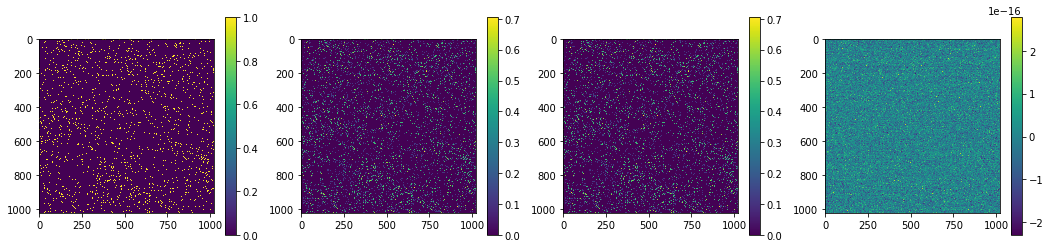

In [10]:
a = np.load('test/problem halos.npy', allow_pickle=True)
b = np.load('test/problem mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

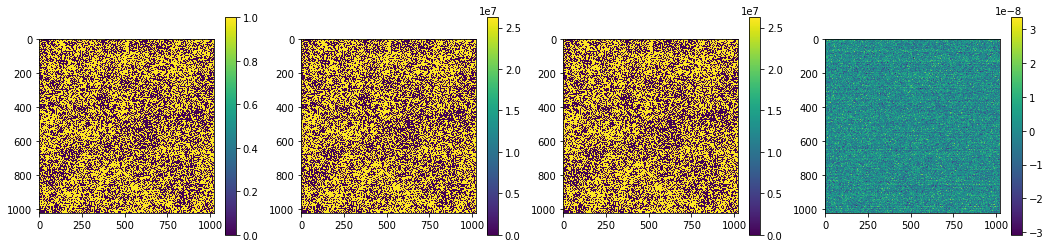

In [11]:
a = np.load('test/problem 2 halos.npy', allow_pickle=True)
b = np.load('test/problem 2 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap') 
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but that's ok
assert (np.allclose(c8, c3, atol=1e-07)), "test failed"



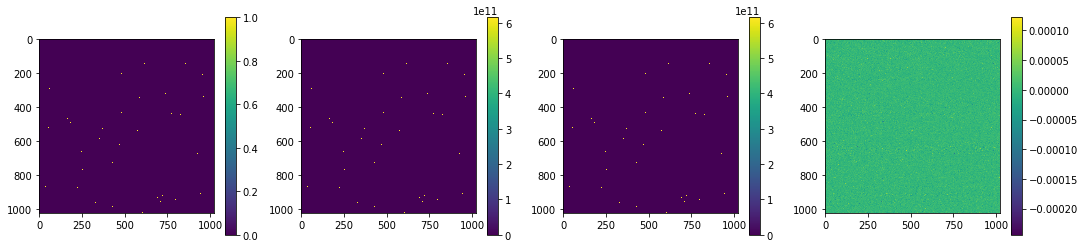

In [12]:
a = np.load('test/problem 3 halos.npy', allow_pickle=True)
b = np.load('test/problem 3 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but it's only because all the numbers are larger in this example
assert (np.allclose(c8, c3, atol=1e-03)), "test failed"



In [13]:
# Regression Testing for hist_profile
# The idea here is to baseline some so one can ensure that future changes to the code do not change the results (up to a tolerance)from cgmbrush import *
REWRITE_BASELINES = False
filename_header = "baseline_e2e_%s"
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(extra=2), NFWProfile(), 1e12)]

for profile in profiles:
    print("Profile: %s" % profile.name)
    config = Configuration(profile, 1, resolution=1, provider=BolshoiProvider())

    config.run()
    results = config.results # histograms, halos-readded field, halo addition masks, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, *results, folder=testFolder)
    else:
        baseline = loadArray(filename_header % profile.name, folder=testFolder)

        # Most important: test the final density grid values
        for i in range(len(config.RS_array)):
            test_pass = np.allclose(results[1][i], baseline[1][i], rtol=1e-10, atol=1e-3)
            if not test_pass:
                plot_grid_comparison(results[1][i], baseline[1][i])
                raise Exception("Test failed for profile '%s'. Final density grid has changed at redshift %f." % profile.name, config.RS_array[i])
        
        # Test all the addition masks across all mass bins
        test_pass = np.allclose(results[2], baseline[2], rtol=1e-10, atol=1e-3)
        if not test_pass:
            raise Exception("Test failed for profile '%s'. Addition masks have changed." % profile.name)

        # Not testing histograms, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses.

        if not test_pass:
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")


Profile: tophat
Performing Calculations for tophat1_256_2021-09-09


/Users/ianw89/Repos/cgm-brush/src/cgmbrush.py:481: RuntimeWarning: invalid value encountered in double_scalars
  return integrate.quad(lambda x, y, z: rho_nought/(((offset+(x**2+y**2+ z**2)**.5)/R_s)*(1+((x**2+y**2+ z**2)**.5)/R_s)**2),-1*np.real((Rvir**2-(x**2+y**2))**.5),np.real((Rvir**2-(x**2+y**2))**.5),args=(x,y))[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


Profile: STH
Performing Calculations for STH1_256_2021-09-09
Profile: NFW
Performing Calculations for NFW1_256_2021-09-09
Profile: fire
Performing Calculations for fire1_256_2021-09-09


/Users/ianw89/Repos/cgm-brush/src/cgmbrush.py:475: RuntimeWarning: invalid value encountered in double_scalars
  return integrate.quad(f,-1*np.real((Rvir**2-(x**2+y**2))**.5),np.real((Rvir**2-(x**2+y**2))**.5),args=(x,y))[0]


Profile: precipitation
Performing Calculations for precipitation1_256_2021-09-09
Profile: STH_and_NFW_12.0
Performing Calculations for STH_and_NFW_12.01_256_2021-09-09


In [14]:
# Regression Testing for add_halos
# The idea here is to baseline some so one can ensure that future changes to the code do not change the results (up to a tolerance)
from cgmbrush import *
import numpy as np

REWRITE_BASELINES = False
filename_header = "baseline_add_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(extra=2), NFWProfile(), 1e11)]

for profile in profiles:
    print("Profile: %s" % profile.name)
    results = add_halos(df, 2, bins, profile, 1, 0)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, *results, folder=testFolder)
    else:
        baseline = loadArray(filename_header % profile.name, folder=testFolder)
        test_pass = [np.allclose(results[i], baseline[i], rtol=1e-10, atol=1e-3) for i in range(4)]

        if not test_pass[0]:
            plot_grid_comparison(results[0][0:128, 0:128], baseline[0][0:128, 0:128])

        if not all(test_pass):
            print(test_pass)
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")



Profile: tophat
Profile: STH
Profile: NFW
Profile: fire
Profile: precipitation
Profile: STH_and_NFW_11.0


Halos in use: 80 
[0, 79, 80]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


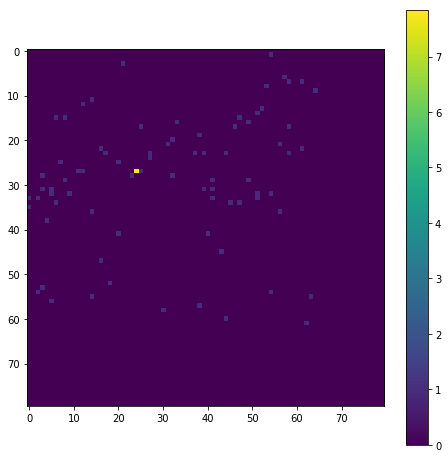

In [15]:
# create_halo_array_for_convolution and add_halos test
# Test that when a bin is empty (repeated values in bins) the code works still.
from cgmbrush import *

provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
print("Halos in use: %s " % len(df))
print(bins)
assert len(bins) == 3, "One of the bins entries should be dropped"

results = add_halos(df, 1, bins, TophatProfile(), 1, 0)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
pos = ax.imshow(results[0][0:80, 0:80])
fig.colorbar(pos, ax=ax)
fig.show()
# No errors or warnings = pass


In [20]:
# Subtract Halos Regression Tests
from cgmbrush import *
import numpy as np

REWRITE_BASELINES = False
filename_header = "baseline_subtract_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0)
df, bins = create_halo_array_for_convolution(halos, 1E10, 10**(15), 30)
profiles = [ 'tophat', 'tophat_spherical', 'NFW' ]

for profile in profiles:
    print("Profile: %s" % profile)
    resolution = 1
    scaling_radius = 1
    redshift = 0
    results = subtract_halos(df, resolution, bins, profile, scaling_radius, redshift)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile, results, folder=testFolder)
    else:
        baseline = loadArray(filename_header % profile, folder=testFolder)
        test_pass = np.allclose(results, baseline, rtol=1e-10, atol=1e-3) # TODO tolerance considerations

        if not test_pass:
            plot_grid_comparison(results, baseline)
            raise Exception("Test failed for profile '%s'" % profile)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")

Profile: tophat
Profile: tophat_spherical
Profile: NFW


cellsize (Mpc): 0.08719308035714286
0.73
comoving radius: 2.606953398484862
True


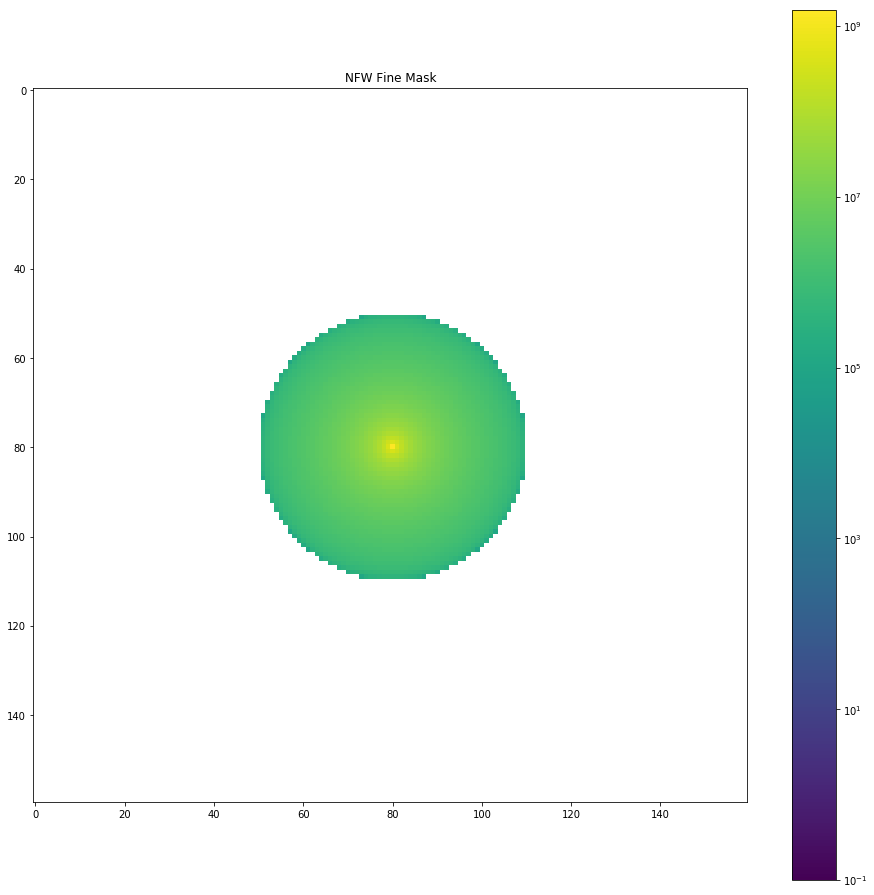

In [3]:
from cgmbrush import *
import matplotlib.colors as colors

# NFW Profile Unit Test
profile = NFWProfile()
mass = 1E15 # solar masses
redshift = 0 
resolution = 4
cellsize = L/(1024 * resolution) # in Mpc on the big grid
print("cellsize (Mpc): %s" % cellsize)
fine_mask_len = 20 * resolution
comoving_radius = (1+redshift)*(mass**(1/3) / Rvir_den(redshift)) # what are the units...
print(q(0))
print("comoving radius: %s" % comoving_radius)

mask = profile.get_mask(1E10, comoving_radius, redshift, resolution, 1, cellsize, fine_mask_len)
fig, ax = plt.subplots(1,1,figsize=(16, 16))
pos = ax.imshow(mask, norm=colors.LogNorm(vmin=1E-1, vmax=mask.max()))
ax.title.set_text('NFW Fine Mask')
fig.colorbar(pos, ax=ax)
